https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data

# Importing Libraries:

In [1]:
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LogNorm
import numpy as np 
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
# Suppress all warnings
warnings.filterwarnings("ignore")

# Loading the Dataset:

In [31]:
# Loading Data
df = pd.read_csv('apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# EDA:

In [32]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [33]:
# Checking for missing values
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [34]:
# Removing the Last Row
df.dropna(axis = 0, inplace = True)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [6]:
# Descriptive Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [7]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")
   
# Example usage:
explore_data(df)

Major Moments:
                    Mean       Median  Standard Deviation  Skewness  Kurtosis
A_id         1999.500000  1999.500000         1154.844867  0.000000 -1.200000
Acidity              NaN     0.022609                 NaN  0.055783 -0.093451
Crunchiness     0.985478     0.998249            1.402757  0.000230  0.722020
Juiciness       0.512118     0.534219            1.930286 -0.113421  0.028735
Ripeness        0.498277     0.503445            1.874427 -0.008764 -0.071850
Size           -0.503015    -0.513703            1.928059 -0.002437 -0.083341
Sweetness      -0.470479    -0.504758            1.943441  0.083850  0.014472
Weight         -0.989547    -0.984736            1.602507  0.003102  0.359050




Across the attributes, the mean and median values generally appear close, suggesting symmetric distributions for most variables. However, there are slight differences between mean and median values in attributes like size, sweetness, and weight, indicating potential asymmetry or outliers affecting the distribution. The standard deviation provides a measure of the variability within each attribute, with higher values indicating greater dispersion. Skewness measures the symmetry of the distribution, with positive values indicating a right-skewed distribution and negative values indicating a left-skewed distribution. For instance, attributes like sweetness and weight exhibit positive skewness, suggesting a tail to the right in their distributions. Kurtosis measures the peakedness of the distribution, with values higher than 3 indicating heavier tails and lower than 3 indicating lighter tails compared to the normal distribution.

In [35]:
# Delete "A_id" column
df.drop("A_id", axis = 1, inplace = True)

In [36]:
df['Acidity'] = pd.to_numeric(df['Acidity'],
                              errors='coerce')

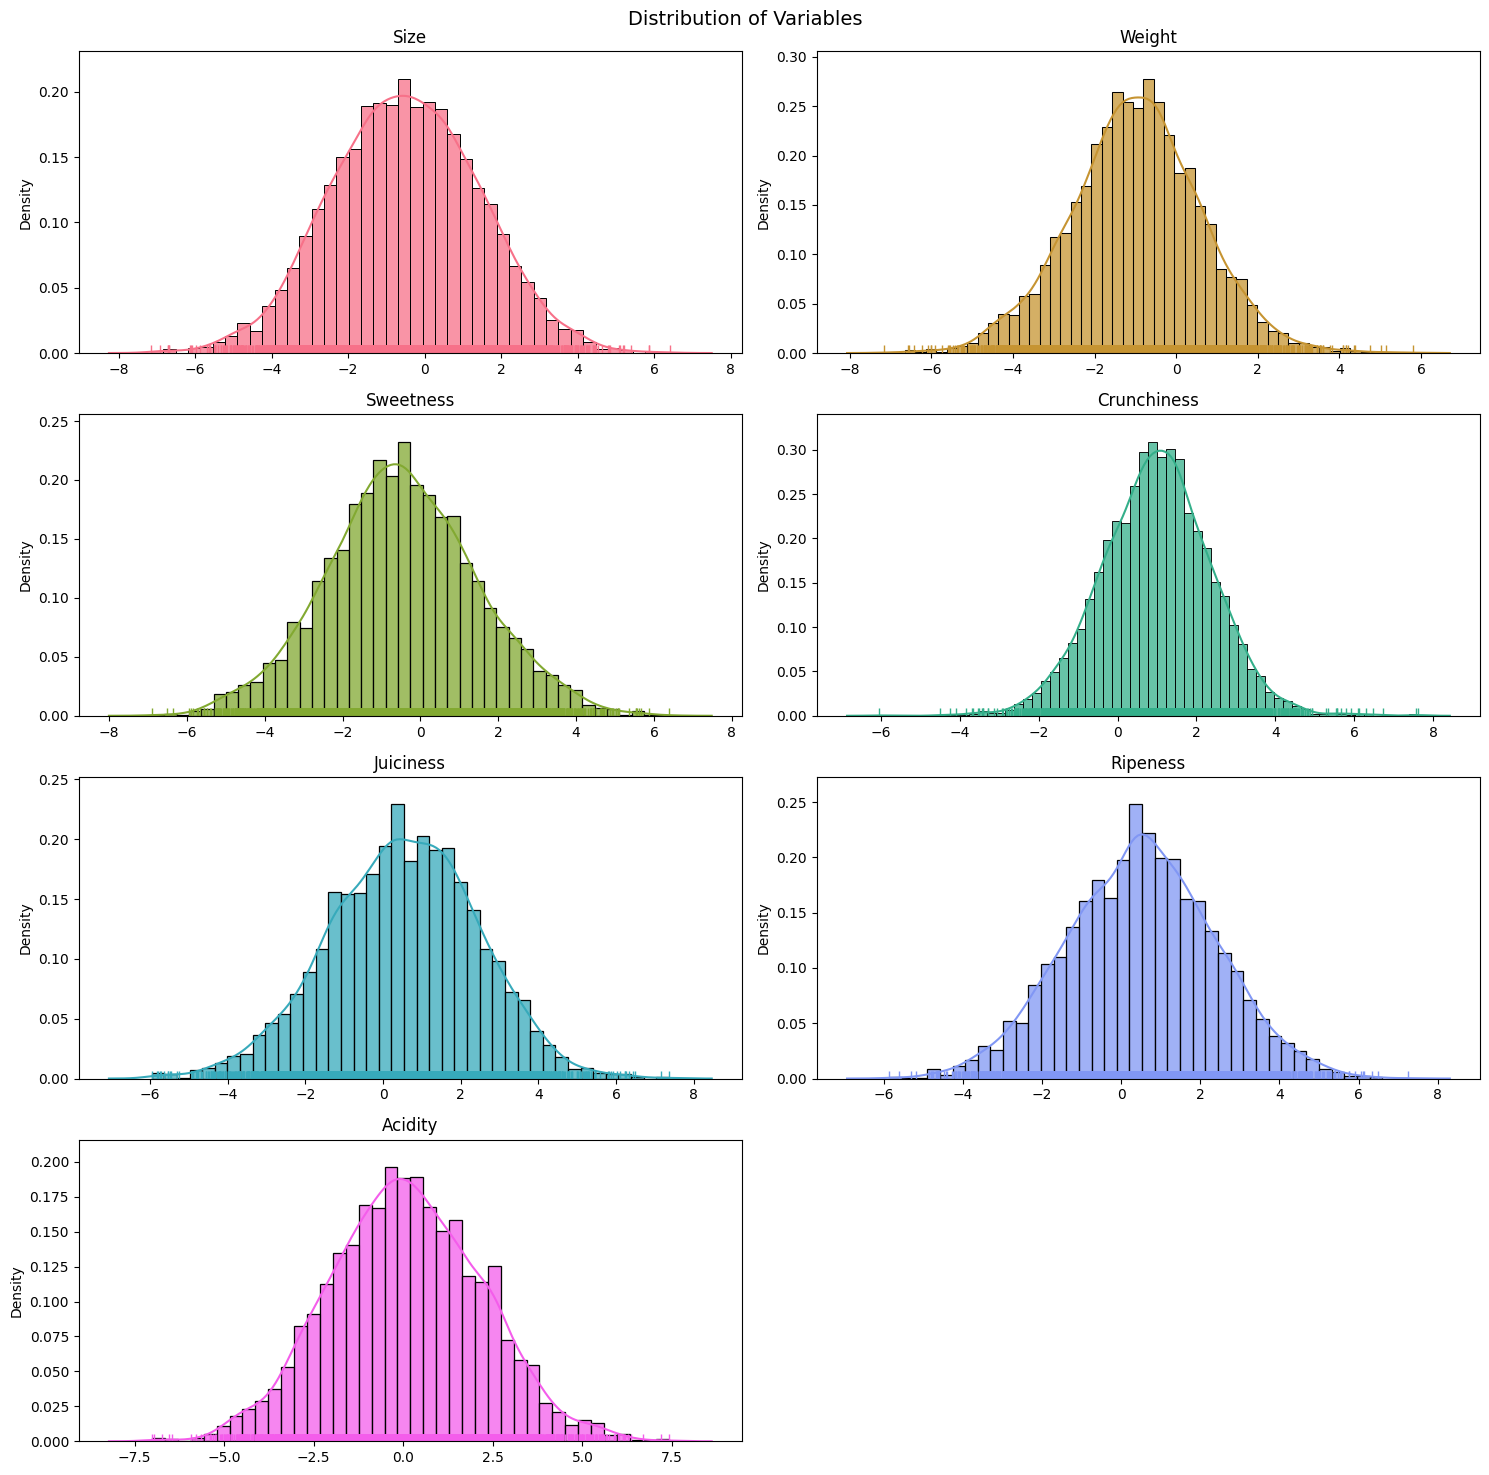

In [10]:
def univariate_analysis(df):
    """
    Perform univariate analysis for each attribute in the DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame containing the attributes.

    Returns:
    - None
    """
    cols = df.columns[:-1]
    colors = sns.color_palette('husl', len(cols))  # husl = hue saturation lightness

    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))  # 4 rows, 2 columns
    axs = axs.flatten()  # flatten the 2D array to 1D array

    for i, col in enumerate(cols):
        sns.kdeplot(df[col], ax=axs[i], color=colors[i])  # kdeplot = kernel density estimation plot 
        sns.histplot(df[col], ax=axs[i], color=colors[i], stat='density')  # histplot = histogram plot 
        sns.rugplot(df[col], ax=axs[i], color=colors[i])  # rugplot = draw a dash mark for every point on a univariate distribution

        axs[i].set_xlabel('')  # remove x label to avoid redundancy
        axs[i].set_title(col)
        plt.tight_layout()

    fig.suptitle("Distribution of Variables", fontsize=14)
    fig.delaxes(ax=axs[len(cols)])  # delete the last plot
    fig.tight_layout()
    plt.show()

# Example usage:
univariate_analysis(df)


<p>Here are some observations based on the plots:</p>
    <ul>
        <li><b>Size:</b> The size variable appears to be approximately normally distributed, with a peak around the mean value.</li>
        <li><b>Weight:</b> The weight variable also shows a relatively normal distribution, with a slight right skewness indicating the presence of heavier fruits.</li>
        <li><b>Sweetness:</b> The sweetness variable exhibits a bimodal distribution, suggesting the presence of two distinct groups of fruits with different sweetness levels.</li>
        <li><b>Crunchiness:</b> The crunchiness variable appears to have a roughly uniform distribution, indicating a relatively even distribution of crunchiness levels among the fruits.</li>
        <li><b>Juiciness:</b> The juiciness variable shows a skewed distribution towards lower values, suggesting that a majority of fruits may have lower juiciness levels.</li>
        <li><b>Ripeness:</b> The ripeness variable exhibits a roughly normal distribution, with a peak around the mean value and some outliers on the right tail indicating overripe fruits.</li>
        <li><b>Acidity:</b> The acidity variable shows a slightly right-skewed distribution, suggesting the presence of fruits with higher acidity levels.</li>
    </ul>

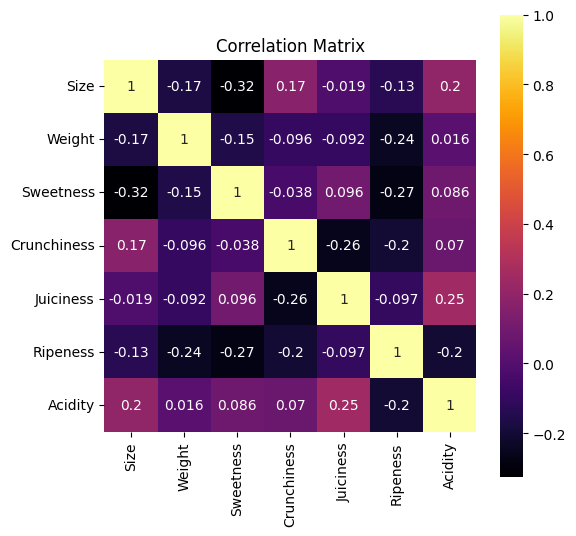

In [11]:
def plot_correlation_matrix(dataframe):
    """
    Plot the correlation matrix for a given DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.

    Returns:
    None

    Example:
    plot_correlation_matrix(df)
    """
    plt.figure(figsize=(6, 6))
    sns.heatmap(dataframe.corr(), cmap='inferno', annot=True, cbar=True, square=True)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)

 <ul>
        <li><b>Size and Weight:</b> There is a weak negative correlation (-0.17) between size and weight, suggesting that larger fruits may tend to be slightly lighter.</li>
        <li><b>Size and Sweetness:</b> There is a moderate negative correlation (-0.32) between size and sweetness, indicating that larger fruits may tend to be slightly less sweet.</li>
        <li><b>Size and Crunchiness:</b> There is a weak positive correlation (0.17) between size and crunchiness, implying that larger fruits may tend to be slightly crunchier.</li>
        <li><b>Weight and Sweetness:</b> There is a weak negative correlation (-0.15) between weight and sweetness, indicating that heavier fruits may tend to be slightly less sweet.</li>
        <li><b>Sweetness and Crunchiness:</b> There is a weak negative correlation (-0.04) between sweetness and crunchiness, suggesting that sweeter fruits may tend to be slightly less crunchy.</li>
        <li><b>Juiciness and Ripeness:</b> There is a weak negative correlation (-0.10) between juiciness and ripeness, implying that juicier fruits may tend to be slightly less ripe.</li>
        <li><b>Juiciness and Acidity:</b> There is a moderate positive correlation (0.25) between juiciness and acidity, indicating that juicier fruits may tend to be slightly more acidic.</li>
        <li><b>Ripeness and Acidity:</b> There is a weak negative correlation (-0.20) between ripeness and acidity, suggesting that riper fruits may tend to be slightly less acidic.</li>
    </ul>

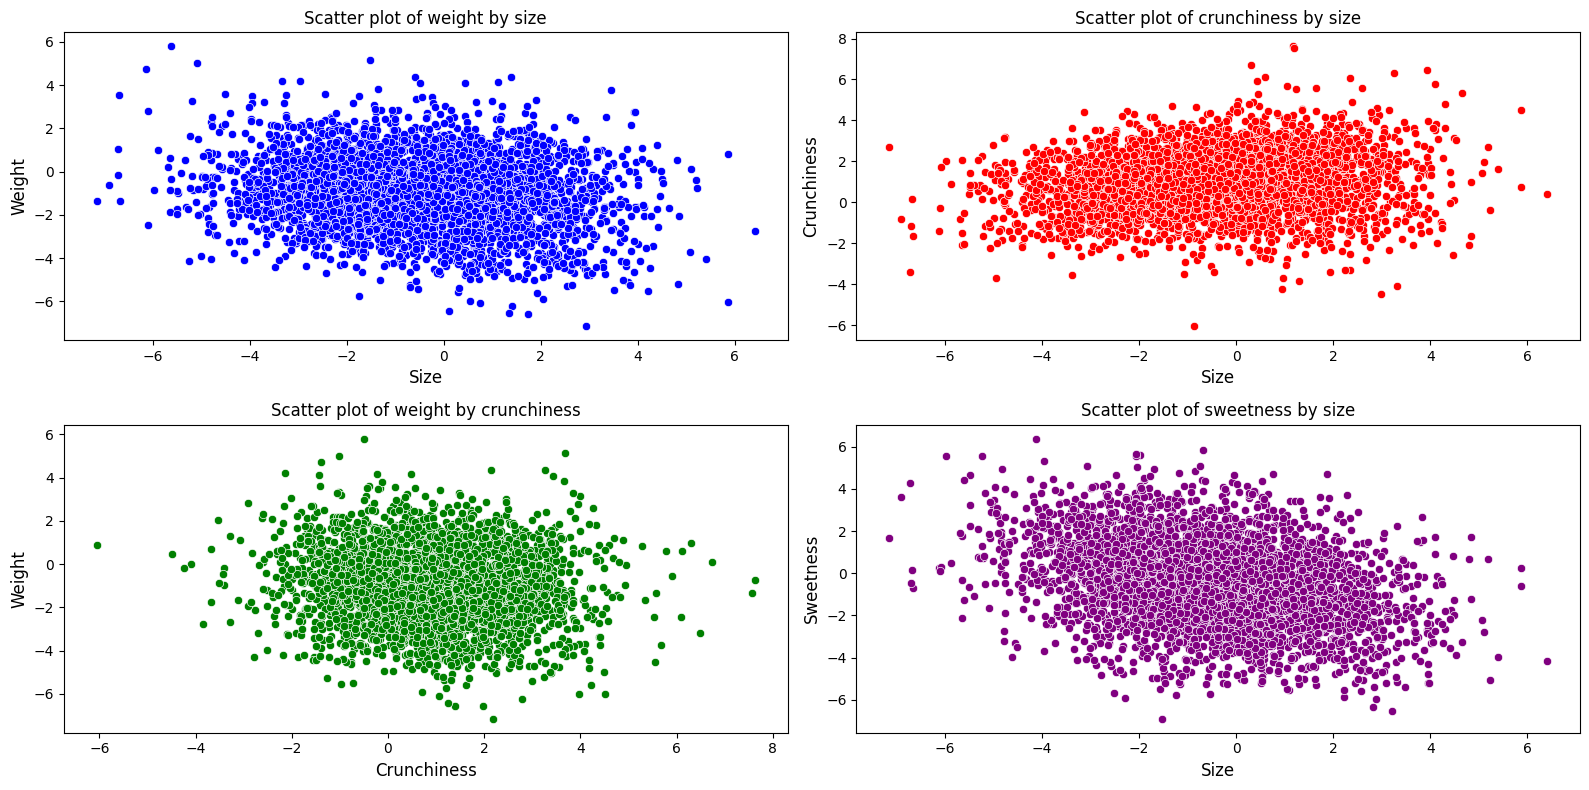

In [12]:
def visualize_scatter_plot_grid(df):
    """
    Visualize scatter plots of different combinations of features in a grid.

    Parameters:
    - df (DataFrame): The input DataFrame containing the relevant columns.

    Returns:
    - None
    """
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

    axes[0, 0].set_title("Scatter plot of weight by size")
    sns.scatterplot(x='Size', y='Weight', ax=axes[0, 0], data=df, color='blue')
    axes[0, 0].set_xlabel('Size', fontsize=12)
    axes[0, 0].set_ylabel('Weight', fontsize=12)

    axes[0, 1].set_title("Scatter plot of crunchiness by size")
    sns.scatterplot(x='Size', y='Crunchiness', ax=axes[0, 1], data=df, color='red')
    axes[0, 1].set_xlabel('Size', fontsize=12)
    axes[0, 1].set_ylabel('Crunchiness', fontsize=12)

    axes[1, 0].set_title("Scatter plot of weight by crunchiness")
    sns.scatterplot(x='Crunchiness', y='Weight', ax=axes[1, 0], data=df, color='green')
    axes[1, 0].set_xlabel('Crunchiness', fontsize=12)
    axes[1, 0].set_ylabel('Weight', fontsize=12)

    axes[1, 1].set_title("Scatter plot of sweetness by size")
    sns.scatterplot(x='Size', y='Sweetness', ax=axes[1, 1], data=df, color='purple')
    axes[1, 1].set_xlabel('Size', fontsize=12)
    axes[1, 1].set_ylabel('Sweetness', fontsize=12)

    plt.tight_layout()
    plt.show()

# Example usage:
visualize_scatter_plot_grid(df)


<p>Each scatter plot represents a combination of two features:</p>
    <ul>
        <li><b>Weight vs. Size:</b> The scatter plot shows the relationship between the weight and size of fruits.</li>
        <li><b>Crunchiness vs. Size:</b> The scatter plot displays the relationship between the crunchiness and size of fruits.</li>
        <li><b>Weight vs. Crunchiness:</b> The scatter plot illustrates the relationship between the weight and crunchiness of fruits.</li>
        <li><b>Sweetness vs. Size:</b> The scatter plot demonstrates the relationship between the sweetness and size of fruits.</li>
    </ul>

good    2004
bad     1996
Name: Quality, dtype: int64


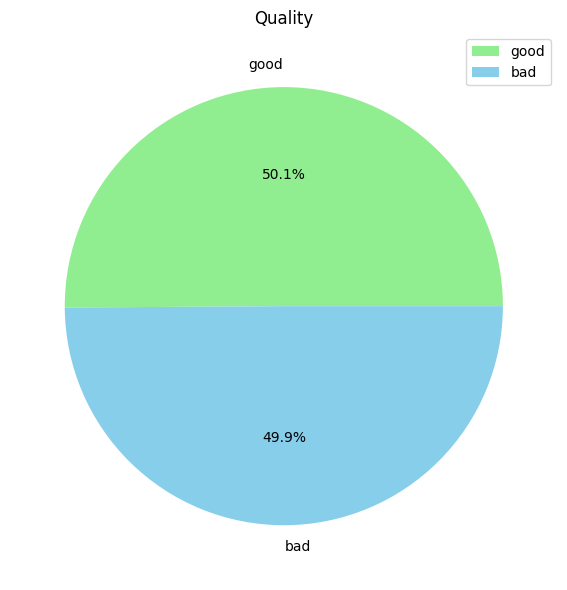

In [13]:
def visualize_quality_distribution(df):
    """
    Visualize the distribution of fruit quality using a pie chart.

    Parameters:
    - df (DataFrame): The input DataFrame containing the 'Quality' column.

    Returns:
    - None
    """
    # Print value counts of quality
    print(df['Quality'].value_counts())

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(df['Quality'].value_counts(), labels=['good', 'bad'], autopct='%1.1f%%', colors=['lightgreen', 'skyblue'])
    plt.legend()
    plt.title('Quality')
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_quality_distribution(df)

<ul>
        <li>The pie chart illustrates the distribution of fruit quality in the dataset, with 50.1% classified as 'good' and 49.9% classified as 'bad'.</li>
        <li>'Good' quality fruits constitute the majority of the dataset, indicating that the dataset may be imbalanced.</li>
        <li>This distribution provides insights into the proportion of fruits with different quality labels, which can inform further analysis or modeling decisions.</li>
    </ul>

# Clustering:

In [14]:
data = df.copy()
scalar = StandardScaler()
df_std = scalar.fit_transform(data.drop('Quality', axis=1))

In [15]:
# Convert these lists to numpy arrays.
X = np.array(df_std)
Y = np.array(df['Quality'])

# Split into train and test data.
train_data, train_labels = X[:], Y[:]

In [16]:
data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


Fraction of the total variance in the training data that is explained by 1 components is = 21.61 %
Fraction of the total variance in the training data that is explained by 2 components is = 42.48 %
Fraction of the total variance in the training data that is explained by 3 components is = 60.42 %
Fraction of the total variance in the training data that is explained by 4 components is = 76.79 %
Fraction of the total variance in the training data that is explained by 5 components is = 86.91 %
Fraction of the total variance in the training data that is explained by 6 components is = 95.62 %
Fraction of the total variance in the training data that is explained by 7 components is = 100.00 %


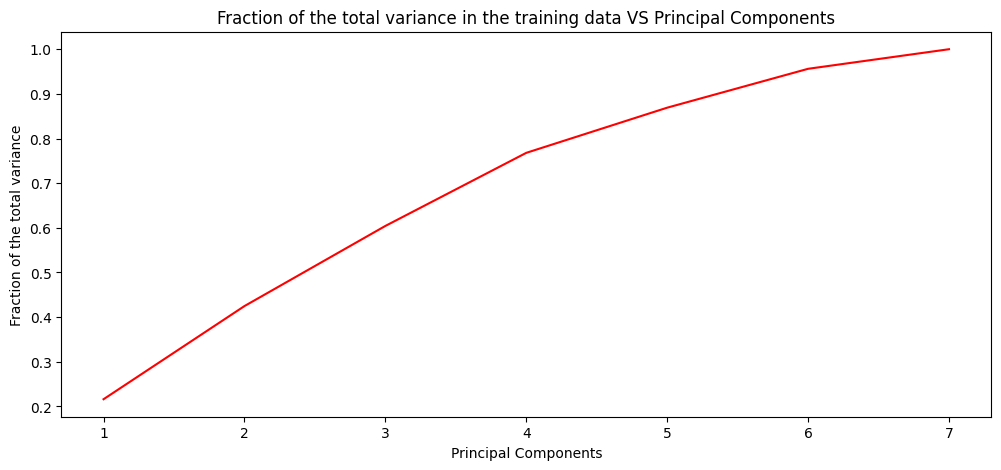

In [17]:
vals = []

# Running for all possible values of k
k = range(1,(len(train_data[1])+1),1)
for comp_int in k:

    # Create PCA Model
    model = PCA(n_components = comp_int)
    model.fit(train_data)
    explained = np.sum(model.explained_variance_ratio_)
    print("Fraction of the total variance in the training data that is explained by %0.0f" %comp_int ,"components is = %0.2f %%" %(explained*100))
    vals.append(explained)

#Graph Results    
fig=plt.figure(figsize=(12,5))
plt.plot(k,vals,color='red')
plt.xlabel("Principal Components")
plt.ylabel("Fraction of the total variance")
plt.title("Fraction of the total variance in the training data VS Principal Components")
plt.show()

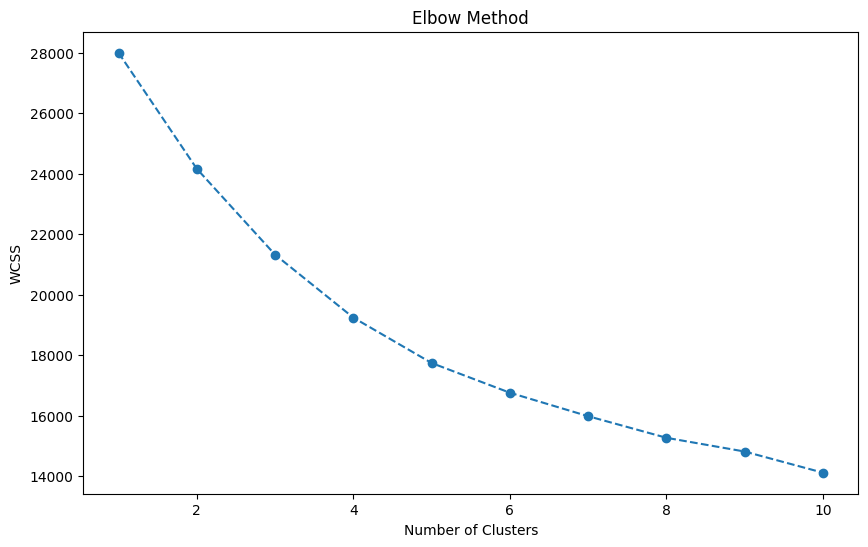

In [18]:
 # Build the PCA Model
model_pca = PCA(n_components = (len(train_data[1])))
train_data_pca = model_pca.fit_transform(train_data)

def plot_elbow_curve(dataframe):
    """
    Determine the optimal number of clusters using the elbow method and plot the elbow curve.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the scaled data.

    Returns:
    None

    Example:
    plot_elbow_curve(df_scaled)
    """
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(dataframe)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_curve(train_data_pca)

In this case, the "elbow" point on the plot appears to be at 5 clusters, indicating that adding more clusters beyond this point does not significantly decrease the WCSS, suggesting diminishing returns in terms of explaining variance in the data. Selecting 5 clusters strikes a balance between adequately explaining the variance in the data and avoiding excessive complexity, providing a meaningful partitioning of the data without unnecessarily overfitting.

In [19]:
def perform_kmeans(data, num_clusters):
    """
    Perform KMeans clustering on the given data.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - num_clusters (int): The number of clusters.

    Returns:
    - cluster_centers (array-like): The coordinates of cluster centers.
    - data_with_clusters (DataFrame): The DataFrame with cluster labels assigned.
    """
    # Build the KMeans Model
    model_kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init='auto')
    kmeans_clusters = model_kmeans.fit(train_data)

    # Extract cluster centers
    cluster_centers = model_kmeans.cluster_centers_

    # Assign cluster labels to the data
    data_with_clusters = data.copy()
    data_with_clusters['kmean_clusters'] = kmeans_clusters.labels_

    return cluster_centers, data_with_clusters

# Example usage:
num_clusters = 5
cluster_centers, data_with_clusters = perform_kmeans(data, num_clusters)

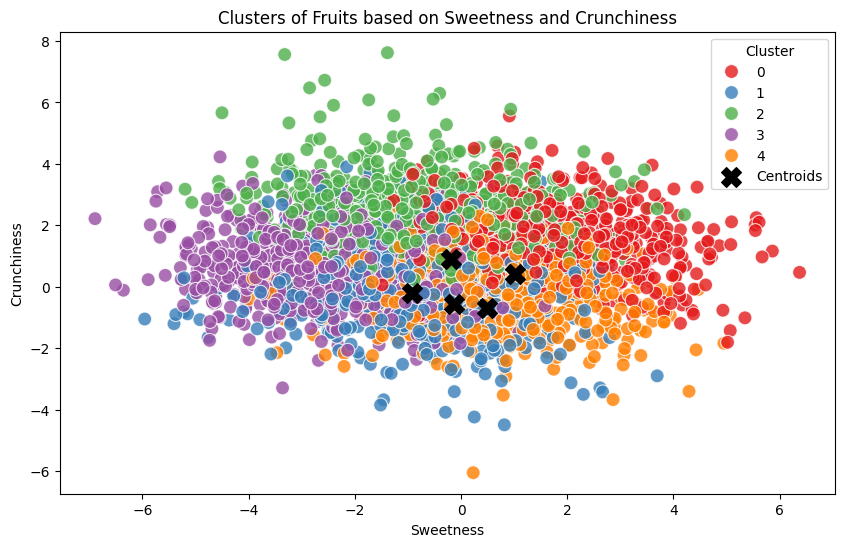

In [20]:
def visualize_clusters(dataframe):
    """
    Visualize the clusters based on sweetness and crunchiness.

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the cluster labels.

    Returns:
    - None

    Example:
    visualize_clusters(data_with_clusters)
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Sweetness', y='Crunchiness', hue='kmean_clusters', data=dataframe, palette='Set1', s=100, alpha=0.8)
    plt.scatter(cluster_centers[:, dataframe.columns.get_loc('Sweetness')], cluster_centers[:, dataframe.columns.get_loc('Crunchiness')], c='black', s=200, marker='X', label='Centroids')
    plt.title('Clusters of Fruits based on Sweetness and Crunchiness')
    plt.xlabel('Sweetness')
    plt.ylabel('Crunchiness')
    plt.legend(title='Cluster')
    plt.show()

# Example usage:
visualize_clusters(data_with_clusters)


 <ul>
        <li>By visually inspecting the plot, we can observe how the fruits are grouped into different clusters based on their sweetness and crunchiness attributes.</li>
        <li>The centroids serve as representative points for each cluster, indicating the central tendency of the cluster in terms of sweetness and crunchiness.</li>
        <li>We can see if there are clear boundaries between clusters or if there is some overlap, which can provide insights into the effectiveness of the clustering algorithm in separating the data points.</li>
        <li>This visualization aids in understanding the distribution of fruits in the dataset and how they naturally cluster together based on these two features.</li>
        <li>Further analysis could involve exploring other combinations of features or evaluating the quality of the clusters based on domain-specific criteria.</li>
    </ul>

# Linear Regression:

In [37]:
# Split the data into features and target variable
X = df.drop(columns=['Quality'])
y = df['Quality']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [44]:
X_test.shape

(800, 7)

In [40]:
# Train the linear regression model
def train_linear_regression(X_train, y_train):
    """
    Train the linear regression model.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (Series): Training target variable.

    Returns:
    - model (LinearRegression): Trained linear regression model.
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Train the linear regression model
model = train_linear_regression(X_train, y_train)

In [41]:
# Evaluat the model's performance
def evaluate_model_performance(model, X_test, y_test):
    """
    Evaluate the performance of the linear regression model.

    Parameters:
    - model (LinearRegression): Trained linear regression model.
    - X_test (DataFrame): Testing features.
    - y_test (Series): Testing target variable.

    Returns:
    - None
    """
    score = model.score(X_test, y_test)
    print("Model R^2 Score:", score)

# Evaluate the model's performance
evaluate_model_performance(model, X_test, y_test)

Model R^2 Score: 0.2932451806133828


The R-squared (R^2) score of the linear regression model is approximately 0.293, indicating that the model explains around 29.3% of the variance in the target variable. While the model is able to capture some of the variability in the data, the relatively low R-squared score suggests that there is still a significant amount of variability in the target variable that is not explained by the features included in the model. 

In [47]:
# Making predictions
y_pred = model.predict(X_test)

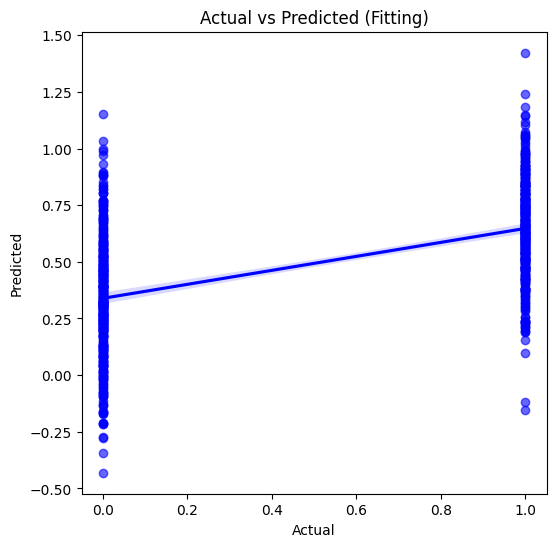

In [48]:
def plot_actual_vs_predicted(y_test, y_pred):
    """
    Plot a scatter plot for fitting with regression line, confidence interval, and error bars.

    Parameters:
    y_test (Series): The actual values of the target variable.
    y_pred (array-like): The predicted values of the target variable.

    Returns:
    None

    Example:
    plot_actual_vs_predicted(y_test, y_pred)
    """
    plt.figure(figsize=(6, 6))
    sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha':0.6})
    plt.title('Actual vs Predicted (Fitting)')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

plot_actual_vs_predicted(y_test,y_pred)


The result of the analysis, as depicted in the plot, suggests a relatively good alignment between the actual and predicted values of the target variable. The regression line appears to follow a diagonal trend, indicating that the predicted values closely track the actual values. However, there are noticeable deviations from the line, particularly at the extremes of the prediction range. This suggests that the model may struggle to accurately predict values that are either very high or very low. Additionally, the scatter points exhibit some dispersion around the regression line, indicating variability in prediction accuracy across different data instances. 